In [2]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from keras.datasets import mnist

from keras.utils import np_utils

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
##data
(x_train0, y_train0), (x_test0, y_test0) = mnist.load_data()

In [5]:
##reshape
x_train = x_train0.reshape(60000, 784)
x_test = x_test0.reshape(10000, 784)

y_train = np_utils.to_categorical(y_train0, 10)
y_test = np_utils.to_categorical(y_test0, 10)

In [6]:
##normalize
x_train = x_train-x_train.min()
x_train = x_train/x_train.max()
x_train.min(), x_train.max()

(0.0, 1.0)

In [7]:
## function 
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

In [8]:
f_1 = Dense(500, activation='sigmoid')
f_2 = Dense(500, activation='relu')
f_3 = Dense(500, activation='sigmoid')
f_4 = Dense(500, activation='tanh')
f_5 = Dense(10, activation='softmax')

x = Input(shape=(784,))

h_1 = f_1(x)
h_2 = f_2(x)
c1 = concatenate([h_1, h_2])
h_3 = f_3(c1)
h_4 = f_4(h_3)
y = f_5(h_4)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
model = Model(x, y)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 500)          392500      input_1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 1000)         0           dense_1[0][0]                    
                                                                 dense_2[0][0]                    
__________

In [10]:
model.compile(loss='mse', optimizer=SGD(lr=0.08), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=100, epochs=20, verbose=1, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0895 - acc: 0.1976 - val_loss: 0.0843 - val_acc: 0.2596
Epoch 2/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.0871 - acc: 0.3146 - val_loss: 0.0751 - val_acc: 0.3724
Epoch 3/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.0825 - acc: 0.3429 - val_loss: 0.0774 - val_acc: 0.3772
Epoch 4/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0725 - acc: 0.4596 - val_loss: 0.0730 - val_acc: 0.4560
Epoch 5/20
60000/60000 [==============================] - 11s 189us/step - loss: 0.0595 - acc: 0.6112 - val_loss: 0.0547 - val_acc: 0.6071
Epoch 6/20
60000/60000 [==============================] - 11s 176us/step - loss: 0.0466 - acc: 0.7176 - val_loss: 0.0456 - val_acc: 0.6841
Epoch 7/20
60000/60000 [==============================] - 14s 240us/

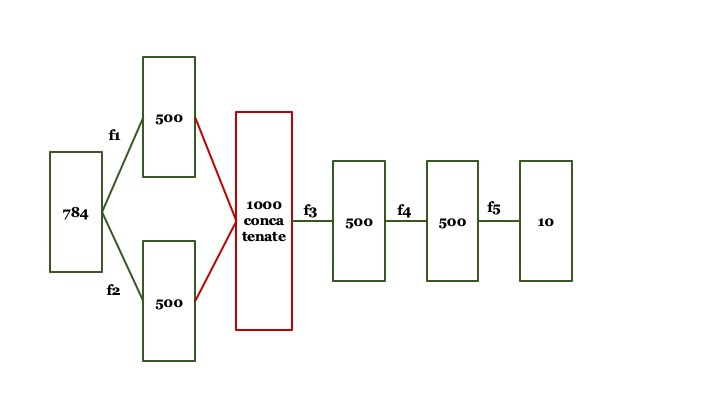

In [20]:
score = model.evaluate(x_train, y_train, batch_size=10000)
print("Loss: %f" %score[0])
print("準確率: %f" %(score[1]*100))

60000/60000 [==============================] - 3s 55us/step
Loss: 0.014004
準確率: 91.078333
